In [213]:
import pandas as pd
import os

### Merging 12 months of data in single file


In [281]:
#df = pd.read_csv('/Users/indre/Desktop/mano/Sales_Data/Sales_December_2019.csv')


#files = [file for file in os.listdir('/Users/indre/Desktop/mano/Sales_Data')]

#all_month_data = pd.DataFrame()

#for file in files:
    #df = pd.read_csv('/Users/indre/Desktop/mano/Sales_Data'+ file)
    #all_month_data = pd.concat([all_month_data, df])
    
#all_month_data.head()



In [215]:
all_data = pd.read_csv('/Users/indre/Downloads/sales-analysis-with-pandas-main/all_data.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [216]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df ### surandam kur NAN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Find and delete "OR"

In [218]:
all_date=all_data[all_data['Order Date'].str[0:2]!='Or']
all_date  #pakeitėm į != ir isaugojom all_date

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Convert columns to the correct type

In [219]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')   #make int
all_data['Price Each']=  pd.to_numeric(all_data['Price Each'], errors='coerce') #make float

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Add month column

In [220]:
all_data['Month']= all_data['Order Date'].str[0:2]

all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### Add a sales column

In [221]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


### What was the best month for sales? How much earned that month?


In [222]:
results=all_data.groupby('Month').sum()

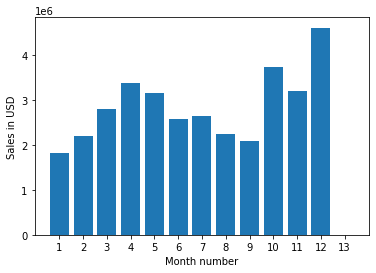

In [223]:
import matplotlib.pyplot as plt
months = range(1,14)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### What US city had the highest number of sales?

### Add city column

In [224]:
# .apply()

In [262]:
def get_city(address):
    return address.split(',')[1:-1]

def get_state(address):
    return address.split(',')[-1].split(' ')[1:-1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x) + get_state(x))

#all_data['City']= all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)}')

all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,NEW,City2,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,"[' Dallas', 'TX']","[' Dallas', 'TX']","[ Dallas, TX]"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,"[' Boston', 'MA']","[' Boston', 'MA']","[ Boston, MA]"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"[' Los Angeles', 'CA']","[' Los Angeles', 'CA']","[ Los Angeles, CA]"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']","[' Los Angeles', 'CA']","[ Los Angeles, CA]"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']","[' Los Angeles', 'CA']","[ Los Angeles, CA]"
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,"[' Los Angeles', 'CA']","[' Los Angeles', 'CA']","[ Los Angeles, CA]"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']","[' San Francisco', 'CA']","[ San Francisco, CA]"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']","[' San Francisco', 'CA']","[ San Francisco, CA]"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,"[' San Francisco', 'CA']","[' San Francisco', 'CA']","[ San Francisco, CA]"


In [268]:
all_data['City2'] = all_data['City'].astype(str)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City2
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,"[ Dallas, TX]","[' Dallas', 'TX']"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,"[ Boston, MA]","[' Boston', 'MA']"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"[ Los Angeles, CA]","[' Los Angeles', 'CA']"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"[ Los Angeles, CA]","[' Los Angeles', 'CA']"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,"[ Los Angeles, CA]","[' Los Angeles', 'CA']"
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,"[ Los Angeles, CA]","[' Los Angeles', 'CA']"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,"[ San Francisco, CA]","[' San Francisco', 'CA']"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,"[ San Francisco, CA]","[' San Francisco', 'CA']"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,"[ San Francisco, CA]","[' San Francisco', 'CA']"


In [269]:
del all_data['City']

In [270]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City2
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,"[' Dallas', 'TX']"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,"[' Boston', 'MA']"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"[' Los Angeles', 'CA']"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']"
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,"[' Los Angeles', 'CA']"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,"[' San Francisco', 'CA']"


### What US city had the highest number of sales?

In [272]:
results = all_data.groupby('City2').sum()
results

,Quantity Ordered,Price Each,Sales
City2,,,
"[' Atlanta', 'GA']",16602.0,2.779908e+06,2.795499e+06
"[' Austin', 'TX']",11153.0,1.809874e+06,1.819582e+06
"[' Boston', 'MA']",22528.0,3.637410e+06,3.661642e+06
"[' Dallas', 'TX']",16730.0,2.752628e+06,2.767975e+06
"[' Los Angeles', 'CA']",33289.0,5.421435e+06,5.452571e+06
"[' New York City', 'NY']",27932.0,4.635371e+06,4.664317e+06
"[' Portland', 'ME']",2750.0,4.471893e+05,4.497583e+05
"[' Portland', 'OR']",11303.0,1.860558e+06,1.870732e+06
"[' San Francisco', 'CA']",50239.0,8.211462e+06,8.262204e+06


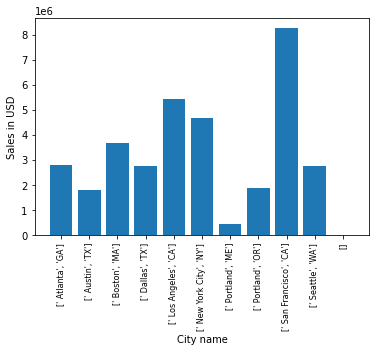

In [273]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City2')] ####
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City name')
plt.show()

### What time we should display advertisments to maximize buyings?

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],errors='coerce')
all_data


In [285]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City2,Hours,Minutes,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,"[' Dallas', 'TX']",8.0,46.0,8.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,"[' Boston', 'MA']",22.0,30.0,22.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"[' Los Angeles', 'CA']",14.0,38.0,14.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']",14.0,38.0,14.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']",9.0,27.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,"[' Los Angeles', 'CA']",20.0,56.0,20.0
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']",16.0,0.0,16.0
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,"[' San Francisco', 'CA']",7.0,39.0,7.0
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,"[' San Francisco', 'CA']",17.0,30.0,17.0


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City2,Hours,Minutes
Hour,,,,,,,,,,,
0.0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1.0,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2.0,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3.0,831,831,831,831,831,831,831,831,831,831,831
4.0,854,854,854,854,854,854,854,854,854,854,854


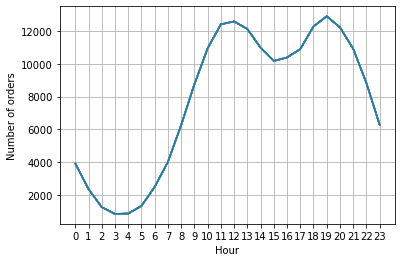

In [294]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()

all_data.groupby(['Hour']).count().head(5)



### What products are most often sold together?

In [297]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

## tas pats id ir produktai į viena eilute

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df


<ipython-input-297-56ee446dccda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City2,Hours,Minutes,Hour,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"[' Los Angeles', 'CA']",14.0,38.0,14.0,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"[' Los Angeles', 'CA']",14.0,38.0,14.0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,"[' Los Angeles', 'CA']",19.0,42.0,19.0,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,"[' Los Angeles', 'CA']",19.0,42.0,19.0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,"[' Boston', 'MA']",11.0,31.0,11.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,"[' Atlanta', 'GA']",20.0,18.0,20.0,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,"[' Atlanta', 'GA']",0.0,25.0,0.0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,"[' Atlanta', 'GA']",0.0,25.0,0.0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,"[' San Francisco', 'CA']",13.0,49.0,13.0,"Google Phone,USB-C Charging Cable"


In [ ]:
# kadangi sudejo kiekviena, tai gaunasi kiekvieno duplikatai

In [298]:
df =df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [299]:
from itertools import combinations
from collections import Counter

In [ ]:
### What products are most often sold together?

In [305]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)
    

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


### What product sold the most? Why do you think it sold the most?

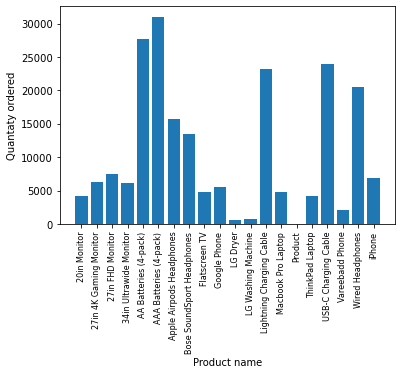

In [314]:
product_group=all_data.groupby('Product')
#product_group.sum()

quantaty_ordered = product_group.sum()['Quantity Ordered']


products = [product for product, df in product_group] ####
plt.bar(products, quantaty_ordered)

plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantaty ordered')
plt.xlabel('Product name')
plt.show()

In [317]:
prices = all_data.groupby('Product').mean()['Price Each']
prices ### produkto kaina

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
Product                           NaN
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-327-bddc5e1ee41b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size='8')


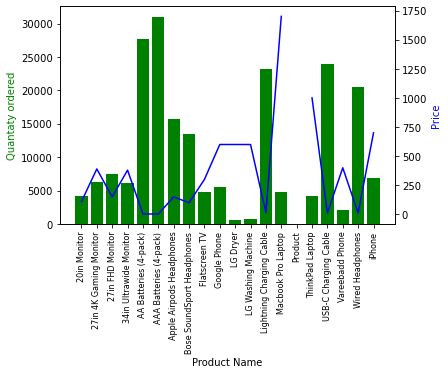

In [327]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantaty_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantaty ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size='8')

plt.show()